# Description
*author:* Vina My Pham<br>
*supervisor:* Robin van der Weide<br>
*project:* MSc internship project<br>
<br>
*date:* January 15 - July 26, 2024<br>
*host:* Kind group, Hubrecht Institute<br>
*university:* Bioinformatics, Wageningen University & Research<br>

---
Notebook to view and export subsections of confocal imaging data



---
**Input**<br>
1. A three-channel TIF file of the confocal imaging stack.
---
**Output**
> Several plots:
    > 1. An overview of the separate channels of the middle plane
    > 2. The middle plane (channels stacked), including grid and axes, for easy subsection selection
    > 3. An overview of the subsection:<br>
    >   a. window indicated in the complete middle plane<br>
    >   b. the subsection<br>
    >   c,d,e. RGB-channels of the subsection separated<br><br>
- three-channel TIF file of the subsection
---
**References**
- https://bioimagebook.github.io/chapters/1-concepts/4-colors/python.html

# Notebook initialisation

## pip install


In [ ]:
!pip install matplotlib-scalebar

## imports

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

import skimage.io
import numpy as np
import cv2
import tifffile

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## custom colormap


In [3]:
#https://stackoverflow.com/questions/57268627/matplotlib-color-gradient-between-two-colors

colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
redmap = LinearSegmentedColormap.from_list(
        "Black2Red", colors, N=100)

colors = [(0, 0, 0), (0, 1, 0)] # first color is black, last is green
greenmap = LinearSegmentedColormap.from_list(
        "Black2Green", colors, N=100)

colors = [(0, 0, 0), (0, 0, 1)] # first color is black, last is blue
bluemap = LinearSegmentedColormap.from_list(
        "Black2Blue", colors, N=100)

rgb_map = {0:redmap, 1:greenmap, 2:bluemap}

# Input files

**Description:** The user provides the required input files here.

---

**Input:**

**Returns:**


Input stack has shape (Z x X x Y x channels):  (100, 1024, 1024, 3)


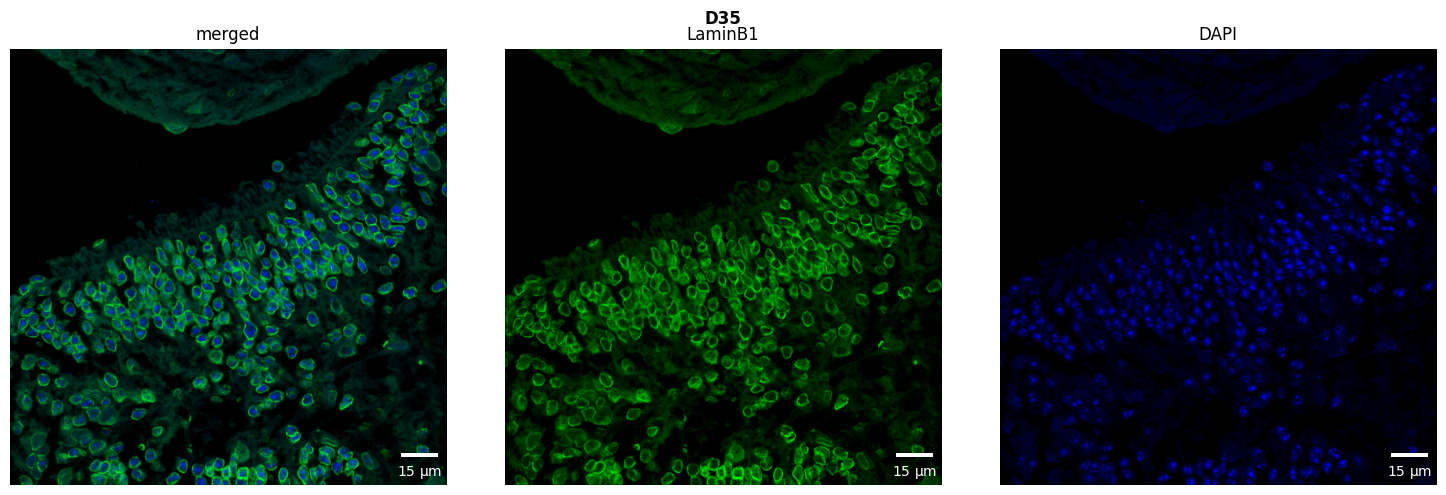

In [101]:
#data input
img = "/content/content/gdrive/MyDrive/msc-internship_HI_2024_vmp/00_raw_data/full_zstacks/SPE_20230327_D35.tif" #@param {type:"string"}
img_name = "D35" #@param {type:'string'}
px_scale = 0.17 #@param {type:"raw"}
length_fraction = 0.10 #@param {type:"raw"}

#data load
img = skimage.io.imread(img)
if len(img.shape) == 4:
    print("Input stack has shape (Z x X x Y x channels): ", img.shape)
elif len(img.shape) == 3:
    print("Input stack has shape (Z x X x Y): ", img.shape)

#init
nplanes=img.shape[0]
iplane = round(nplanes/2) #middle plane

if len(img.shape) == 4:
    im = img[iplane, :, :, :]

    r_channel = 2
    g_channel = 1
    b_channel = 0

    #visualisation of middle plane
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    im_zero = im.copy()
    im_zero[:,:,r_channel] = 0
    im_composite = np.dstack((im_zero[:,:,r_channel],im[:,:,g_channel],im[:,:,b_channel]))

    axes[0].imshow(im_composite)
    axes[0].set_title('merged')
    axes[0].axis(False)

    axes[1].imshow(im[:,:,g_channel],cmap=rgb_map.get(1))
    axes[1].set_title(f'LaminB1')
    axes[1].axis(False)

    axes[2].imshow(im[:,:,b_channel],cmap=rgb_map.get(2))
    axes[2].set_title(f'DAPI')
    axes[2].axis(False)

    for axis in axes:
        scalebar = ScaleBar(px_scale, "um", color='white', box_alpha=0, length_fraction=length_fraction, location='lower right')
        axis.add_artist(scalebar)

    plt.suptitle(img_name, weight="bold")
    plt.tight_layout()
    plt.show();

elif len(img.shape) == 3:
    #visualisation of middle plane
    im = img[iplane, :, :]
    figure = plt.figure(figsize=(5,5))
    plt.imshow(im, cmap='nipy_spectral')
    plt.axis('off')


# Select subsection

**Description:**

---

**Input:**

**Returns:**


## Show with axes

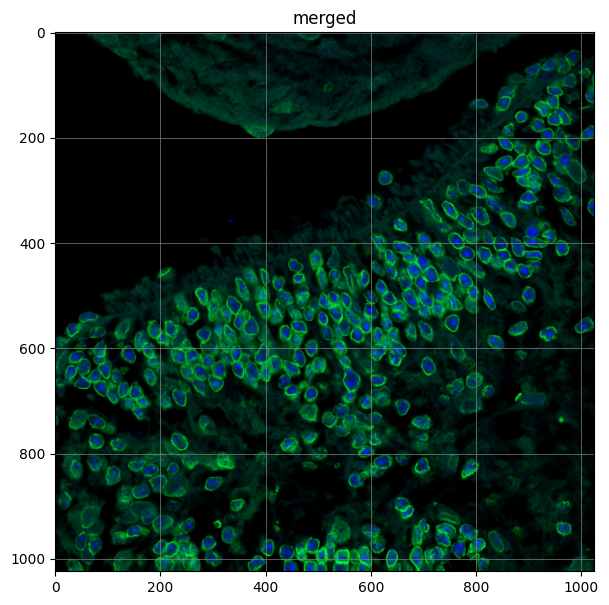

In [93]:
figsize=(7,7) #@param
grid = True #@param {type:"boolean"}

if len(img.shape) == 4:
    plt.figure(figsize=figsize)
    plt.imshow(im_composite)
    if grid:
        plt.grid(True, color='gray', linestyle='-', linewidth=0.5)
    plt.title('merged');
else:
    plt.figure(figsize=figsize)
    plt.imshow(im)
    if grid:
        plt.grid(True, color='gray', linestyle='-', linewidth=0.5)
    plt.title('complete XY');

#init
subsection_coords = []

Window size (x,y): 200 x 200


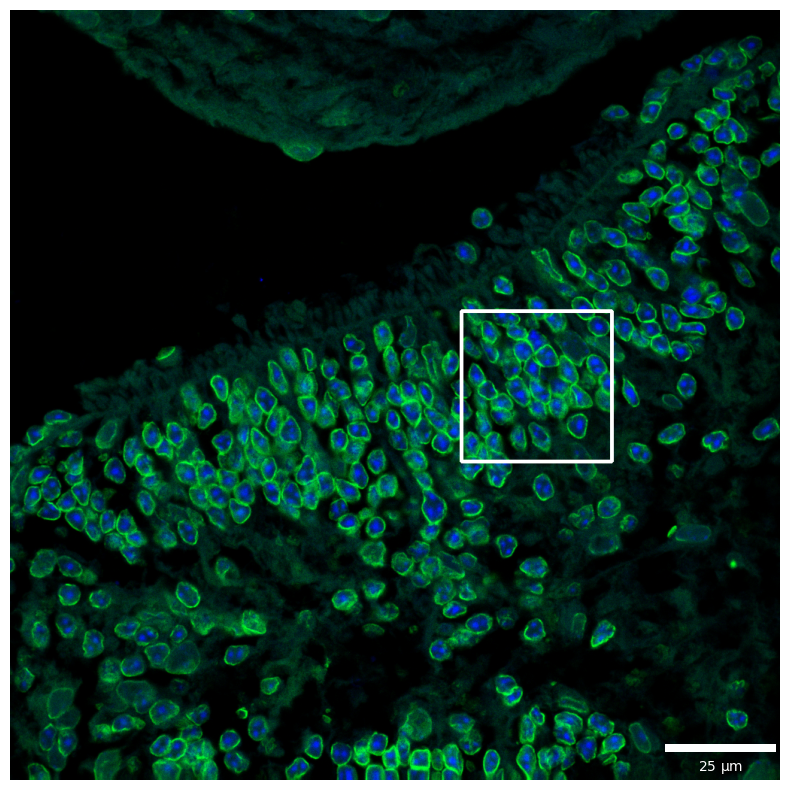

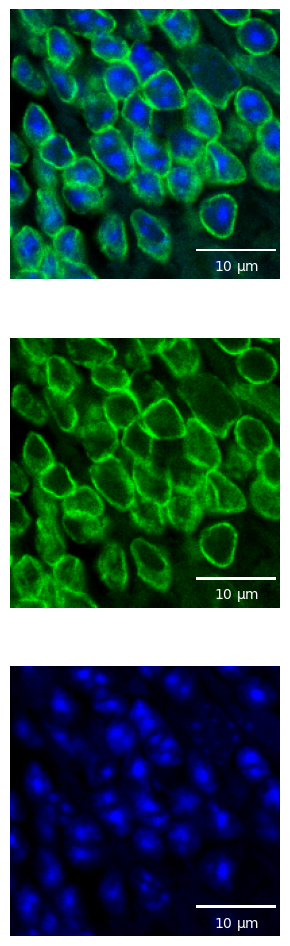

In [112]:
#@markdown **coordinate selection**
iplane=47 #@param {type:"number"}
x0,x1 = (600,800) #@param {type:"raw"}
y0,y1 = (400,600) #@param {type:"raw"}

#@markdown **visualisation options**
figsize=(3,10) #@param {type:"raw"}
outline_bgr = (255, 255, 255) #@param {type:"raw"}
outline_width = 3 #@param {type:"number"}

#@markdown **scalebar fraction**
length_fraction = 0.35 #@param {type:"raw"}

#data processing
im = img[iplane, :, :, :]
im_zero = im.copy()
im_zero[:,:,r_channel] = 0
im_composite = np.dstack((im_zero[:,:,r_channel],im[:,:,g_channel],im[:,:,b_channel]))

#get subsection
if len(img.shape) ==4:
    sub_img = im_composite[y0:y1, x0:x1, :]

else:
    sub_img = im[y0:y1, x0:x1]
print(f"Window size (x,y): {x1-x0} x {y1-y0}")

#plot whole img, with white box
if len(img.shape) ==4:
    im_with_outline = np.copy(im_composite)
if len(img.shape) == 3:
    im_with_outline = np.copy(im)
cv2.rectangle(im_with_outline, (x0, y0), (x1, y1), outline_bgr, outline_width)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im_with_outline, cmap='nipy_spectral', vmin=0, vmax=255)
scalebar = ScaleBar(0.17, "um", color='white', box_alpha=0, length_fraction=0.25, location='lower right')
ax.add_artist(scalebar)
ax.axis('off')
plt.show();

#plot subsection
if len(img.shape) == 4:
    #all channels are shown separately
    fig, axes = plt.subplots(3,1, figsize=figsize) #skip one channel
else:
    #no channels. only the window is shown.
    fig, axes = plt.subplots(1,2, figsize=figsize)

axes[0].imshow(sub_img)
scalebar = ScaleBar(0.17, "um", color='white', box_alpha=0, length_fraction=length_fraction, location='lower right')
axes[0].add_artist(scalebar)
axes[0].axis('off')

if len(img.shape) == 4:
    for ichannel in np.arange(sub_img.shape[-1]):
        if ichannel==0: continue

        iplot = ichannel
        axes[iplot].imshow(sub_img[:,:,ichannel], cmap=rgb_map.get(ichannel), vmin=0, vmax=255)
        axes[iplot].axis('off')

        scalebar = ScaleBar(0.17, "um", color='white', box_alpha=0, length_fraction=length_fraction, location='lower right')
        axes[iplot].add_artist(scalebar)
else:
    axes[1].imshow(sub_img, cmap='prism')
#plt.suptitle(f"window: {x0}:{x1}x{y0}:{y1}")
plt.tight_layout()

plt.show();

subsection_coords.append((x0,x1,y0,y1))
subsection_coords = list(set(subsection_coords))

# Export

**Description:**

---

**Input:**

**Returns:**


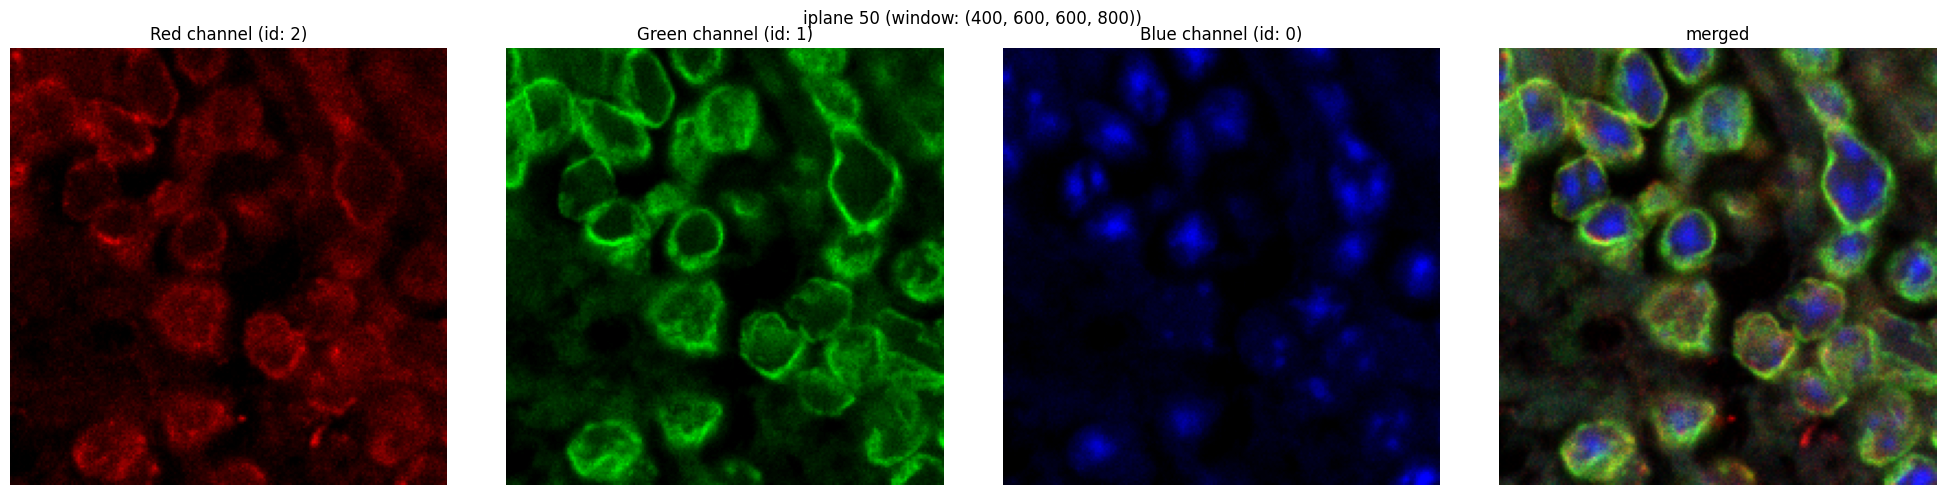

In [85]:
#@markdown [save the portioned img]
select_idx = 0 #@param {type:"number"}
xy_inversed= True #@param {type:"boolean"}
if xy_inversed:
    y0,y1,x0,x1 = subsection_coords[select_idx]
else:
    x0,x1,y0,y1 = subsection_coords[select_idx]
subsection_img = img[:,x0:x1, y0:y1,:]

#init
iplane = round(nplanes/2) #middle plane
im = subsection_img[iplane, :, :, :]

r_channel = 2
g_channel = 1
b_channel = 0

#visualisation of middle plane
fig, axes = plt.subplots(1,4, figsize=(20,5))

axes[0].imshow(im[:,:,r_channel],cmap=rgb_map.get(0))
axes[0].set_title(f'Red channel (id: {r_channel})')
axes[0].axis(False)

axes[1].imshow(im[:,:,g_channel],cmap=rgb_map.get(1))
axes[1].set_title(f'Green channel (id: {g_channel})')
axes[1].axis(False)

axes[2].imshow(im[:,:,b_channel],cmap=rgb_map.get(2))
axes[2].set_title(f'Blue channel (id: {b_channel})')
axes[2].axis(False)

im_composite = np.dstack((im[:,:,r_channel],im[:,:,g_channel],im[:,:,b_channel]))
axes[3].imshow(im_composite)
axes[3].set_title('merged')
axes[3].axis(False)

plt.suptitle(f"iplane {iplane} (window: {subsection_coords[select_idx]})")
plt.tight_layout()
plt.show();

In [86]:
out_dir = "" #@param {type:"string"}
#out_name = f"merged_SPE2023_D35_mask{mask1}-{mask2}_x{x0}-{x1}_y{y0}-{y1}.tif" #@param {type: "raw"}
out_name = f"{img_name}_img_x{x0}-{x1}_y{y0}-{y1}.tif" #@param {type: "raw"}
tifffile.imwrite(out_dir+out_name, subsection_img, bigtiff=True)